# **Introduction for the ACC ML California Housing Project**

## **Introduction**

My name is Ian Olsen and this will be my log book to keep track of all data related to the California Housing Data project for Dr. Mohsin.

## **Initial task**
The first take is to perform an Exploratory Data Analysis (EDA) on a dataset related to housing. The purpose of this analysis is to gain insights into the data, clean the dataset, handle missing values, and prepare it for further modeling. We will be utilizing a dataset used in the second chapter of Aurélien Géron's book 'Hands-On Machine learning with Scikit-Learn and TensorFlow' which is also located on [GitHub](https://colab.research.google.com/drive/10ih2UZiZs1qGDmqKZyz8bC2NpX1k9C8I#scrollTo=rz6hZ1Iyq7jr&line=8&uniqifier=1).  


1. **Initial Exploration**: Confirming the data types of each feature, checking for missing values, and visualizing the data to understand its distribution.
2. **Data Cleaning**: Handling missing values by either dropping rows and/or columns or imputing them and converting categorical features into usable formats.
3. **Correlation Analysis**: Checking for correlations between features and the target attribute to identify potential relationships.
4. **Data Preparation**: Splitting the dataset into training and test sets for model evaluation.

## **Dataset Description**

The dataset used in this analysis contains information about various aspects of housing. Each row represents a different housing unit, and the columns include features such as:

- **longitude**: The longitude of the housing unit's location
- **latitude**: The latitude of the housing unit's location
- **housing_median_age**: The median age of the houses in the area
- **total_rooms**: The total number of rooms in the housing unit
- **total_bedrooms**: The total number of bedrooms in the housing unit
- **population**: The population of the area where the housing unit is located
- **households**: The number of households in the area
- **median_income**: The median income of the households in the area
- **median_house_value**: The median value of the houses in the area
- **ocean_proximity**: The proximity of the housing unit to the ocean (categorical feature)


## **Objectives**

The main objectives of this analysis are:
- To understand the structure and distribution of the data.
- To identify and handle missing values appropriately.
- To encode categorical variables for model compatibility.
- To explore relationships between features and a target variable.
- To prepare the dataset for training a ML model.

## **Tools and Libraries**

We will be using the following tools and libraries to perform the analysis:
- **Pandas**: For data manipulation and analysis
- **NumPy**: For numerical operations
- **Matplotlib & Seaborn**: For data visualization
- **Scikit-Learn**: For data preprocessing and model evaluation

## **Getting Started**

To begin the analysis, we first need to load the necessary libraries and import the datasets(training and test) as needed.



## Python version assertion and Scikit package importation.



In [ ]:
import sys

assert sys.version_info >= (3, 7)

In [ ]:
from packaging import version
import sklearn
assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

## Data importation from GitHub.

In [ ]:
#import libraries Pandas, pathlib(Path), tarfile, and urllib's request
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import warnings



warnings.simplefilter(action='ignore', category=FutureWarning)

#Method that handles loading housing data from unzipped tarball
def load_housing_data():
  tarball_path = Path("datasets/housing.tgz")

  #Check that tarball already exists and if not download it
  if not tarball_path.is_file():
    Path("datasets").mkdir(parents=True, exist_ok=True)
    url = "https://github.com/ageron/data/raw/main/housing.tgz"
    print(f"Downlaoding from {url}...")
    urllib.request.urlretrieve(url, tarball_path)

    #Extract tarball
    try:
      with tarfile.open(tarball_path) as housing_tarball:
        print("Extracting tarball...")
        housing_tarball.extractall(path="datasets")
    except tarfile.TarError as e:
      print(f"Error extracting tarball: {e}")
      return None

  #Load the CSV file
  csv_path = Path("datasets/housing/housing.csv")
  if not csv_path.is_file():
    print(f"CSV fle is not located in expected location: {csv_path}")
    return None

  #Return the CSV
  return pd.read_csv(csv_path)

#Create new variable from calling the load_housing_data method
housing = load_housing_data()

if housing is not None:
  print("Housing data has loaded successfully")
  print(housing.head())

else:
  print("Housing data failed to laod.")


Housing data has loaded successfully
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


## Taking some moments to explore the data.


###Confirming datatypes for each of our features and preliminary exploration.

In [ ]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing['population'].value_counts()

population
891.0      25
761.0      24
850.0      24
1052.0     24
1227.0     24
           ..
3563.0      1
2878.0      1
10323.0     1
5217.0      1
6912.0      1
Name: count, Length: 3888, dtype: int64

In [ ]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [ ]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [ ]:
housing['households'].describe()

count    20640.000000
mean       499.539680
std        382.329753
min          1.000000
25%        280.000000
50%        409.000000
75%        605.000000
max       6082.000000
Name: households, dtype: float64

In [ ]:
housing.sample(13)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7157,-118.08,33.96,35.0,2104.0,399.0,1659.0,387.0,4.0096,165000.0,<1H OCEAN
18636,-122.60,38.11,23.0,8642.0,1294.0,3594.0,1253.0,5.3962,301500.0,<1H OCEAN
18988,-117.80,33.75,29.0,3058.0,488.0,1197.0,474.0,5.3903,286600.0,<1H OCEAN
6226,-119.59,34.39,35.0,622.0,170.0,278.0,139.0,3.6969,335000.0,<1H OCEAN
17987,-122.01,36.99,29.0,227.0,45.0,112.0,41.0,6.4469,271400.0,NEAR OCEAN
6953,-117.94,33.80,28.0,2914.0,489.0,1500.0,499.0,4.9429,254800.0,<1H OCEAN
167,-117.16,32.80,37.0,422.0,79.0,211.0,80.0,3.0625,159700.0,NEAR OCEAN
6466,-118.32,34.11,48.0,4472.0,1579.0,2796.0,1397.0,2.3974,410700.0,<1H OCEAN
19507,-120.99,39.04,17.0,2289.0,450.0,1182.0,397.0,2.3696,166800.0,INLAND
482,-121.20,37.60,30.0,2110.0,406.0,1301.0,345.0,2.3173,86500.0,INLAND


In [ ]:
print("Outputting data on median incomes for dataset...")
housing['median_income'].describe()

Outputting data on median incomes for dataset...


count    20640.000000
mean         3.870671
std          1.899822
min          0.499900
25%          2.563400
50%          3.534800
75%          4.743250
max         15.000100
Name: median_income, dtype: float64

In [ ]:
housing['total_bedrooms'].value_counts()

total_bedrooms
280.0     55
331.0     51
345.0     50
343.0     49
393.0     49
          ..
1609.0     1
1591.0     1
2506.0     1
2238.0     1
1052.0     1
Name: count, Length: 1923, dtype: int64

# Exploratory Data Analysis




##Initial Exploration

###Reviewing the dataset for any potential missing values, or empty columns and/or rows within the csv file.

In [ ]:
#Check missing values in csv
missing_values = housing.isnull().sum()

#Check for missing columns in attributes
expected_columns = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms",
                    "population", "households", "median_income", "median_house_value", "ocean_proximity"]

#Calculate missing columns
missing_columns = set(expected_columns) - set(housing.columns)

#Calculate missing rows
missing_rows = housing.isnull().all(axis=1).sum()

#Output
print(f'Missing values per column:\n{missing_values}')



Missing values per column:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


According to the output there are approximately 207 missing values in the total_bedrooms attribute.

###Establishing the target attribute vs our feature attributes.

In [ ]:
feature_attributes = ["longitude", "latitude", "housing_median_age", "total_rooms", "total_bedrooms",
                      "population", "households", "median_income", "ocean_proximity"]
target_attribute = "median_house_value"

x = housing[feature_attributes]
y = housing[target_attribute]

print(f'Feature Attributes:\n{x.head()}')
print(f'Target Attribute\nMedian Housing Value:\n{y.head()}')


Feature Attributes:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income ocean_proximity  
0       322.0       126.0         8.3252        NEAR BAY  
1      2401.0      1138.0         8.3014        NEAR BAY  
2       496.0       177.0         7.2574        NEAR BAY  
3       558.0       219.0         5.6431        NEAR BAY  
4       565.0       259.0         3.8462        NEAR BAY  
Target Attribute
Median Housing Value:
0    452600.0
1    358500.0
2    352100.0
3    341300.0
4    342200.0
Name: median_house_value, dtype: float64


###Graphing of attributes.

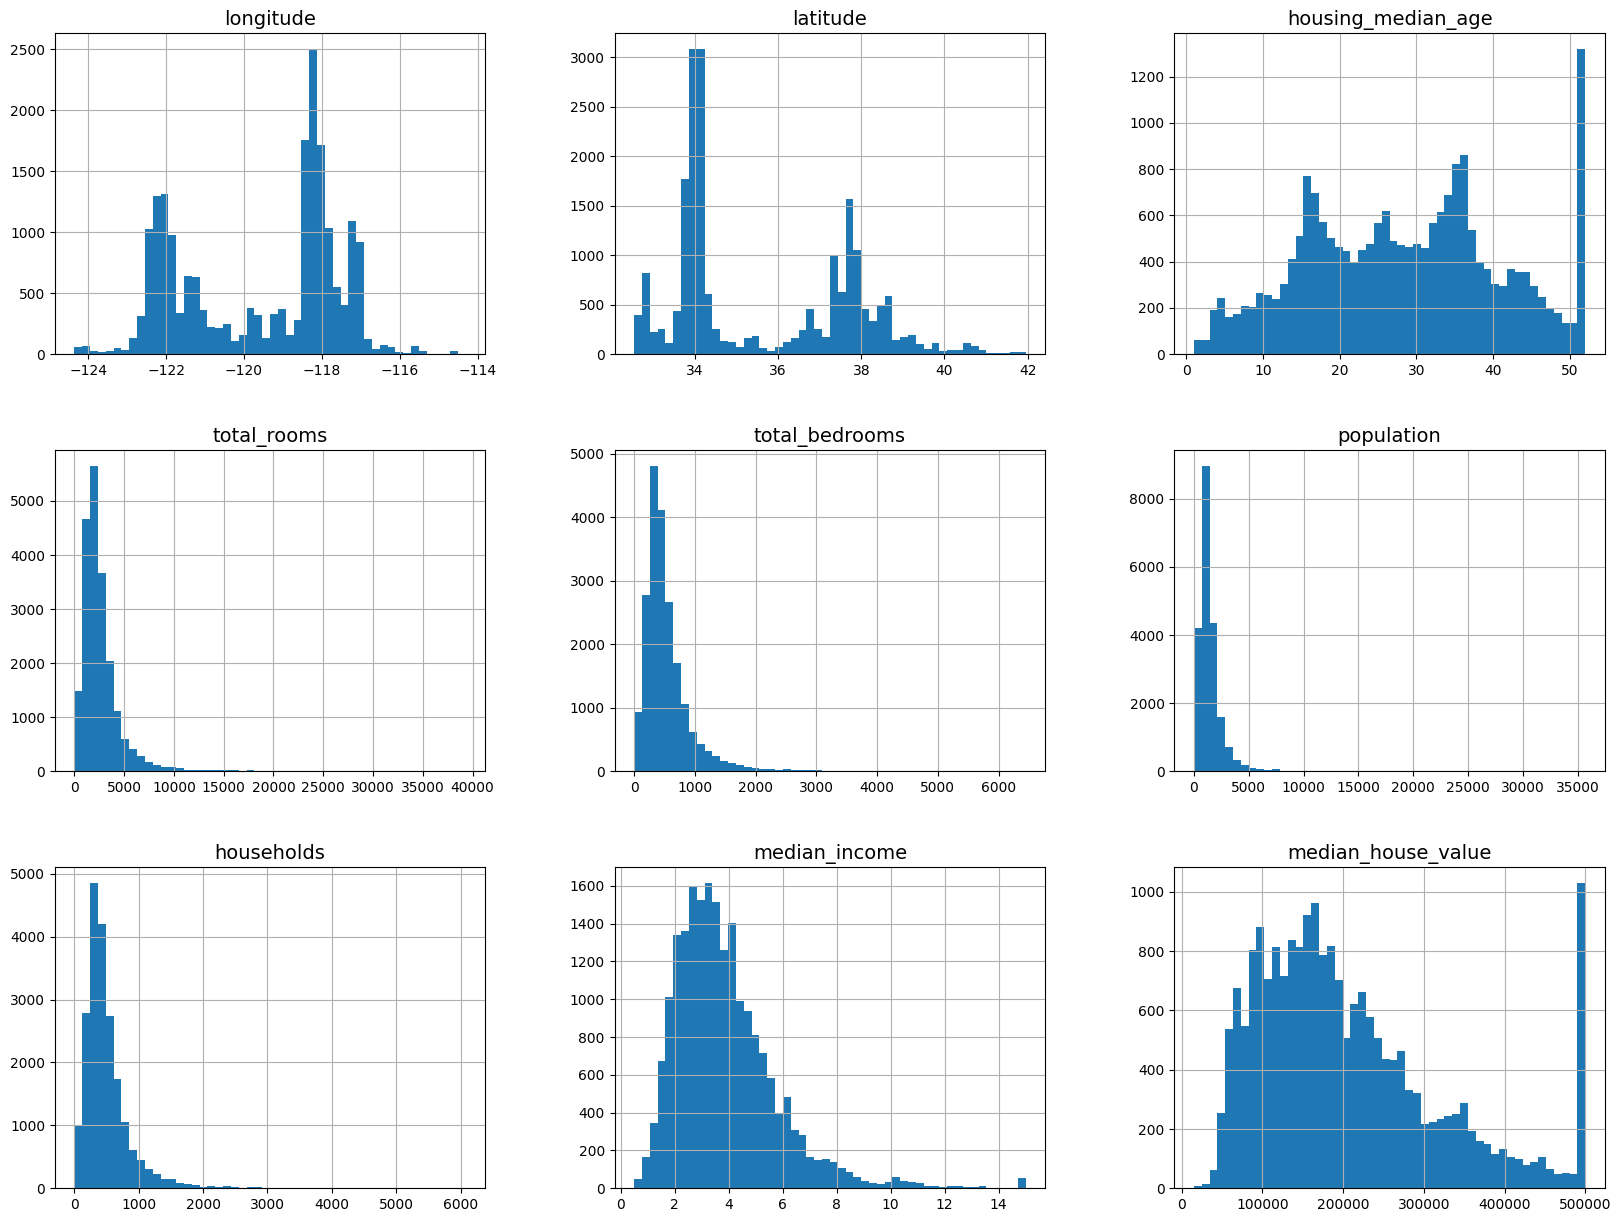

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

housing.hist(bins=50, figsize=(20,15))
plt.show()


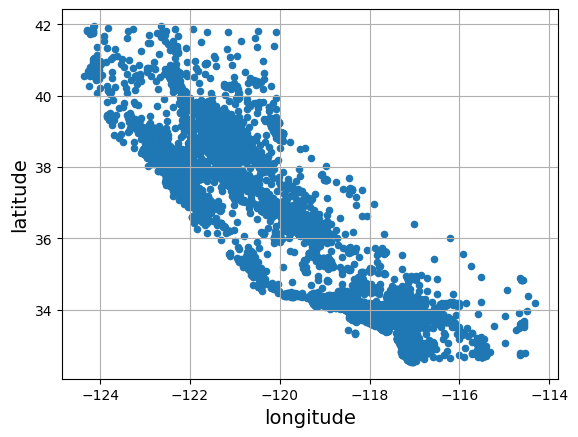

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True)
plt.show()

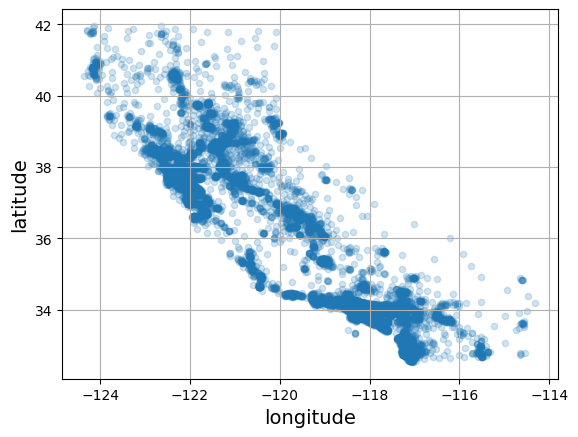

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True, alpha=0.2)
plt.show()

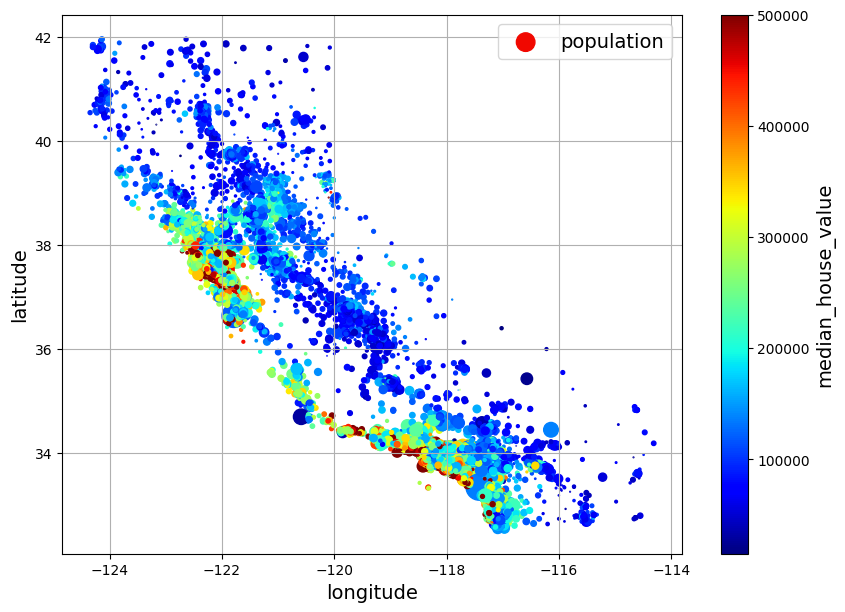

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", grid=True,
             s=housing["population"] / 100, label="population",
             c="median_house_value", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))
plt.show()



Bubble size determines population size with larger bubbles being larger populations, while color determines median house value of the homes in those areas, red for higher values of median house prices and blue for lower values.

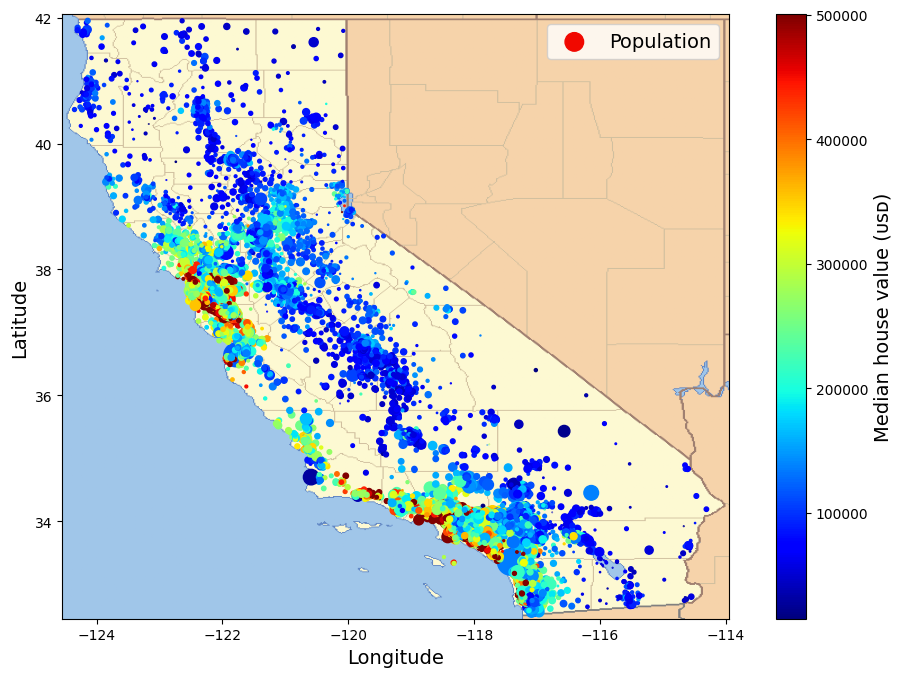

In [ ]:
IMAGES_PATH = Path() / "images" / "end_to_end_project"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)
# Download the California image from github
filename = "california.png"
if not (IMAGES_PATH / filename).is_file():
    homl3_root = "https://github.com/ageron/handson-ml3/raw/main/"
    url = homl3_root + "images/end_to_end_project/" + filename
    print("Downloading", filename)
    urllib.request.urlretrieve(url, IMAGES_PATH / filename)

housing_renamed = housing.rename(columns={
    "latitude": "Latitude", "longitude": "Longitude",
    "population": "Population",
    "median_house_value": "Median house value (ᴜsᴅ)"})
housing_renamed.plot(
             kind="scatter", x="Longitude", y="Latitude",
             s=housing_renamed["Population"] / 100, label="Population",
             c="Median house value (ᴜsᴅ)", cmap="jet", colorbar=True,
             legend=True, sharex=False, figsize=(10, 7))

california_img = plt.imread(IMAGES_PATH / filename)
axis = -124.55, -113.95, 32.45, 42.05
plt.axis(axis)
plt.imshow(california_img, extent=axis)

save_fig("california_housing_prices_plot")
plt.show()

A detailed view of the scatter plot over a map of the State of California.

###Cleaning the data.

Developing an algorithm that can possibly impute data into missing columns without diminishing too much the integrity of results.(Determined that this is not necessary based on the dataset)

There is 20,640 rows total, 207 inputs are missing from the total_bedrooms column. Dropping these rows and columns of data would only constitute a loss of 0.3% of data leaving 99.7% of data original.


In [ ]:
housing_cleaned = housing.dropna(subset=["total_bedrooms"])

print(f'Housing data before dropping the missing data rows:\n{housing.shape}')
print(f'After dropping rows with missing bedrooms:\n{housing_cleaned.shape}')
print('\nHousing Removed:')
print(20640-20433)
#Save the cleaned data
housing_cleaned.to_csv('datasets/housing/cleaned_housing.csv', index=False)

Housing data before dropping the missing data rows:
(20640, 10)
After dropping rows with missing bedrooms:
(20433, 10)

Housing Removed:
207


####Reloading and reviewing dataset after being cleaned.

In [ ]:
def load_cleaned_housing_data(file_path):
    housing_cleaned = pd.read_csv(file_path)
    return housing_cleaned

# Define the file path to the cleaned CSV file
cleaned_file_path = 'datasets/housing/cleaned_housing.csv'

# Load the cleaned data into a new variable
housing_cleaned = load_cleaned_housing_data(cleaned_file_path)

# Display the shape of the cleaned DataFrame to confirm
print(f'Shape of cleaned housing data: {housing_cleaned.shape}')


Shape of cleaned housing data: (20433, 10)


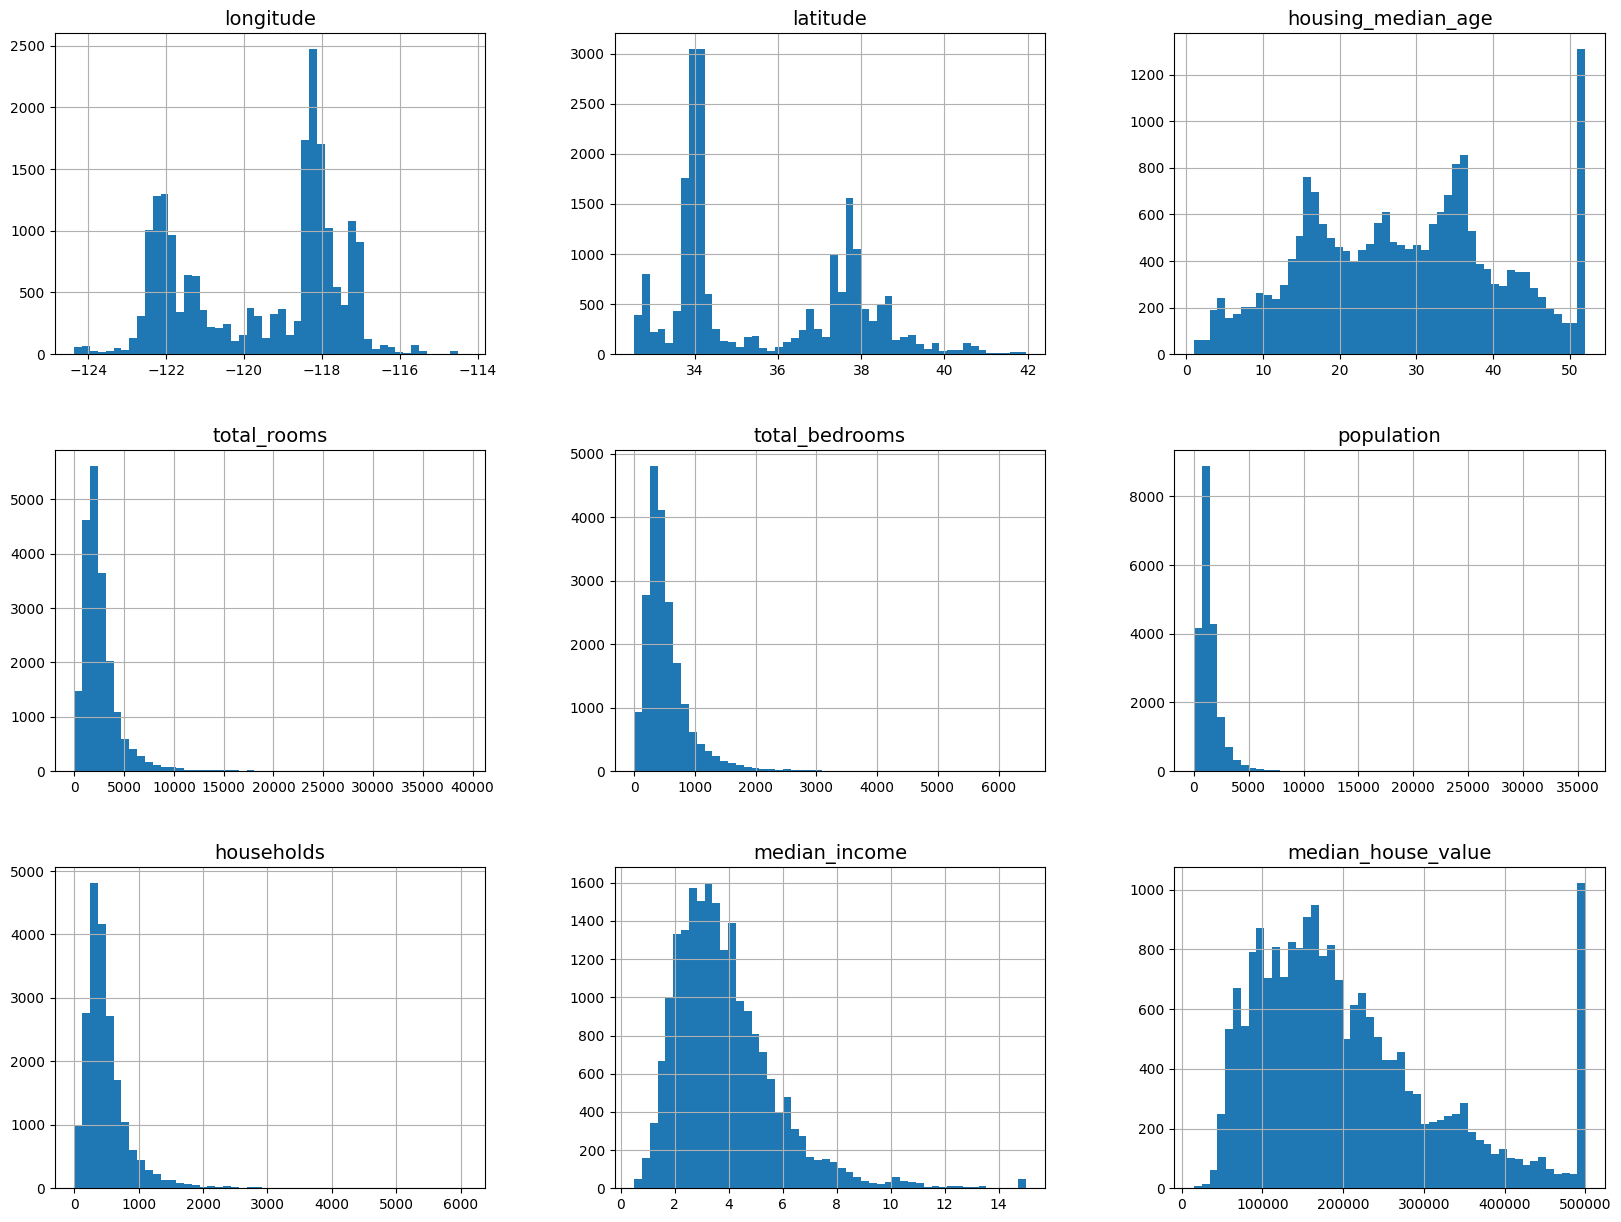

In [ ]:
housing_cleaned.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
corr_matrix = housing.corr(numeric_only=True)

In [ ]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

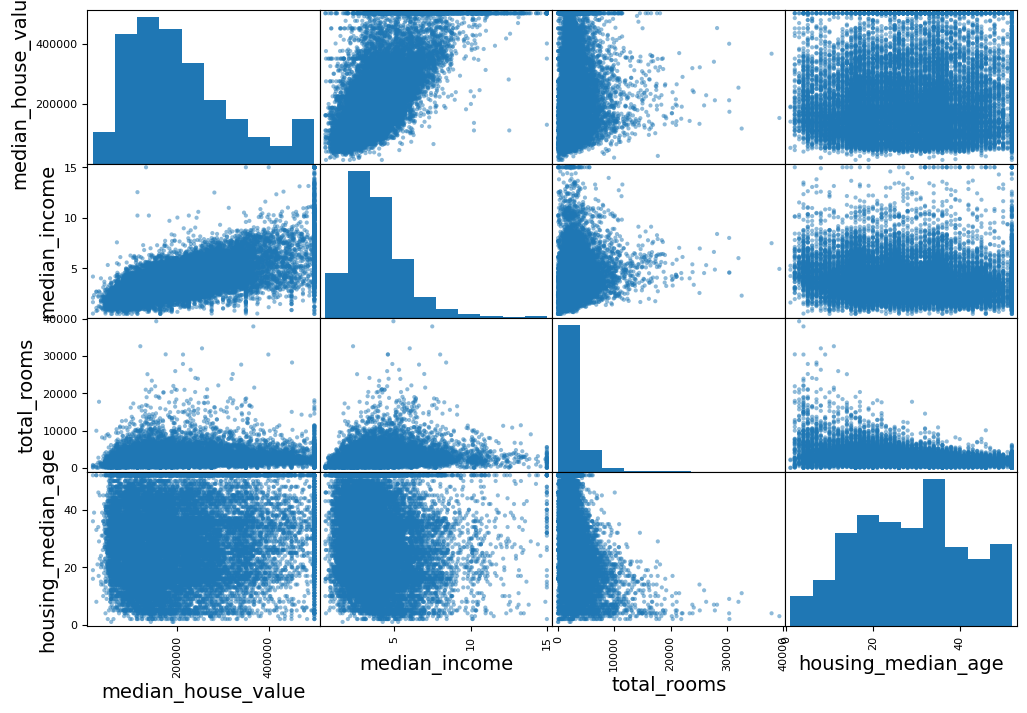

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
plt.show()

It appears that even after cleaning the dataset, the graphs match that which are found in the book.

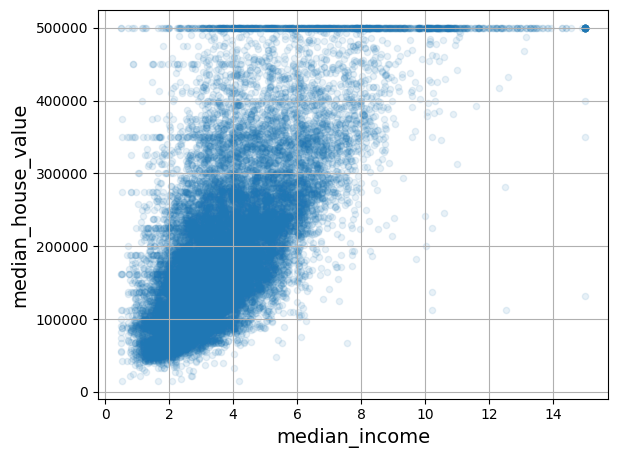

In [ ]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",
             alpha=0.1, grid=True)
plt.show()

####Preprocessing categorical input feature, ocean_proximity.

In [ ]:
housing_cat = housing_cleaned[["ocean_proximity"]]
housing_cat.sample(13)

,ocean_proximity
9979,INLAND
6240,NEAR OCEAN
4410,INLAND
10342,<1H OCEAN
3940,INLAND
19369,NEAR OCEAN
18946,INLAND
15777,NEAR BAY
4962,<1H OCEAN
10068,INLAND


In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

In [ ]:
housing_cat_encoded[:8]

array([[3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.]])

In [ ]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
from sklearn.preprocessing import OneHotEncoder

#update shared by Michael G.
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

#calling to housing_cat_1hot
housing_cat_1hot

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
housing_cleaned_test = pd.DataFrame({'ocean_proximity': ['INLAND', 'NEAR BAY']})
pd.get_dummies(housing_cleaned_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


In [ ]:
housing_cleaned_test_unknown = pd.DataFrame({'ocean_proximity': ['<2H OCEAN', 'ISLAND']})
pd.get_dummies(housing_cleaned_test_unknown)

,ocean_proximity_<2H OCEAN,ocean_proximity_ISLAND
0,True,False
1,False,True


In [ ]:
cat_encoder.handle_unknown = "ignore"
cat_encoder.transform(housing_cleaned_test_unknown)

array([[0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.]])

In [ ]:
cat_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

In [ ]:
cat_encoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [ ]:
housing_output = pd.DataFrame(cat_encoder.transform(housing_cleaned_test_unknown),
                         columns=cat_encoder.get_feature_names_out(),
                         index=housing_cleaned_test_unknown.index)

In [ ]:
housing_output

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0


We have ensured that no we do not look for correlations between houses considered INLAND vs NEAR BAY, we have also added an additional variant to the time attribute... While 1HR from an ocean could be considered in proximity to an ISLAND, we state that anything with greater than 2HR proxomity to the ocean will not correlate with our ISLAND.

###Detecting Outliers

In [ ]:
import numpy as np

# Define a function to detect outliers using the IQR method
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR)))
    return outliers

# Select numerical columns from the housing DataFrame
numerical_columns = housing_cleaned.select_dtypes(include=[np.number]).columns

# Detect outliers for each numerical column
outliers_dict = {}
for col in numerical_columns:
    outliers_dict[col] = detect_outliers_iqr(housing_cleaned[col])

# Combine all outlier masks into a single DataFrame
outliers_df = pd.DataFrame(outliers_dict)

# Display the rows with any outliers
outliers = housing_cleaned[outliers_df.any(axis=1)].head()
outliers

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
89,-122.27,37.80,52.0,249.0,78.0,396.0,85.0,1.2434,500001.0,NEAR BAY
95,-122.26,37.80,36.0,5329.0,2477.0,3469.0,2323.0,2.0096,130000.0,NEAR BAY
96,-122.26,37.82,31.0,4596.0,1331.0,2048.0,1180.0,2.8345,183800.0,NEAR BAY


####Removing the outliers from the dataframe.

In [ ]:
housing_cleaned_outliers = housing_cleaned[~outliers_df.any(axis=1)]

In [ ]:
correlation_matrix = housing_cleaned_outliers[numerical_columns].corr()
target_correlation = correlation_matrix['median_house_value'].sort_values(ascending=False)

# Display the correlation of features with the target attribute
print("Correlations with median_house_value:")
print(target_correlation)

Correlations with median_house_value:
median_house_value    1.000000
median_income         0.628973
total_rooms           0.191652
households            0.120213
housing_median_age    0.098075
total_bedrooms        0.092000
population           -0.011590
longitude            -0.042774
latitude             -0.157842
Name: median_house_value, dtype: float64


####Redoing original correlation matrix in order to check for the percentage difference between the original dataset and dataset with outliers removed.

In [ ]:
# Select numerical columns from the housing DataFrame
numerical_columns = housing_cleaned.select_dtypes(include=[np.number]).columns

# Compute the original correlation matrix
original_correlation_matrix = housing_cleaned[numerical_columns].corr(numeric_only=True)

# Compute the correlation matrix for the cleaned data
cleaned_correlation_matrix = housing_cleaned_outliers[numerical_columns].corr(numeric_only=True)

# Calculate the percentage difference between the original and cleaned correlation matrices
percentage_difference = ((cleaned_correlation_matrix - original_correlation_matrix).abs() / original_correlation_matrix.abs()) * 100

# Display the percentage difference as a DataFrame
percentage_difference_df = percentage_difference.reset_index()
percentage_difference_df.columns = ['Attribute'] + list(percentage_difference.columns)

# Display the percentage difference DataFrame
percentage_difference_df

,Attribute,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,longitude,0.000000,0.135996,20.842913,118.431123,56.585161,13.768864,50.920586,57.951969,5.780660
1,latitude,0.135996,0.000000,210.396000,116.951097,31.705986,33.844335,6.817538,9.279581,9.128602
2,housing_median_age,20.842913,210.396000,0.000000,18.606137,29.533254,37.088466,35.350652,40.677562,7.852405
3,total_rooms,118.431123,116.951097,18.606137,0.000000,4.651064,10.708898,4.311114,40.121130,43.781578
4,total_bedrooms,56.585161,31.705986,29.533254,4.651064,0.000000,6.543349,0.928622,279.312385,85.162196
5,population,13.768864,33.844335,37.088466,10.708898,6.543349,0.000000,5.078500,151.324560,54.188230
6,households,50.920586,6.817538,35.350652,4.311114,0.928622,5.078500,0.000000,3.653300,85.246375
7,median_income,57.951969,9.279581,40.677562,40.121130,279.312385,151.324560,3.653300,0.000000,8.626708
8,median_house_value,5.780660,9.128602,7.852405,43.781578,85.162196,54.188230,85.246375,8.626708,0.000000


These values represent the percentage changes in the correlation coefficients due to the removal of outliers. From the data we can confer that our target feature(Median_House_Value) is most directly correlated to the (Median_Income) attribute. (Total_Rooms) would be the next attribute most closely related to (Median_House_Value).

In [ ]:
value1 = 0.628973
value2 = 0.191652

# Calculate the percentage difference
percentage_difference = (abs(value1 - value2) / ((value1 + value2) / 2)) * 100
percentage_difference

106.58242193450116

However, the difference in correlation between (Median_Income) and (Total_Rooms) is significant at 106.58%.

###Visualizing the correlations.

####Heatmap showing correlation matrix.

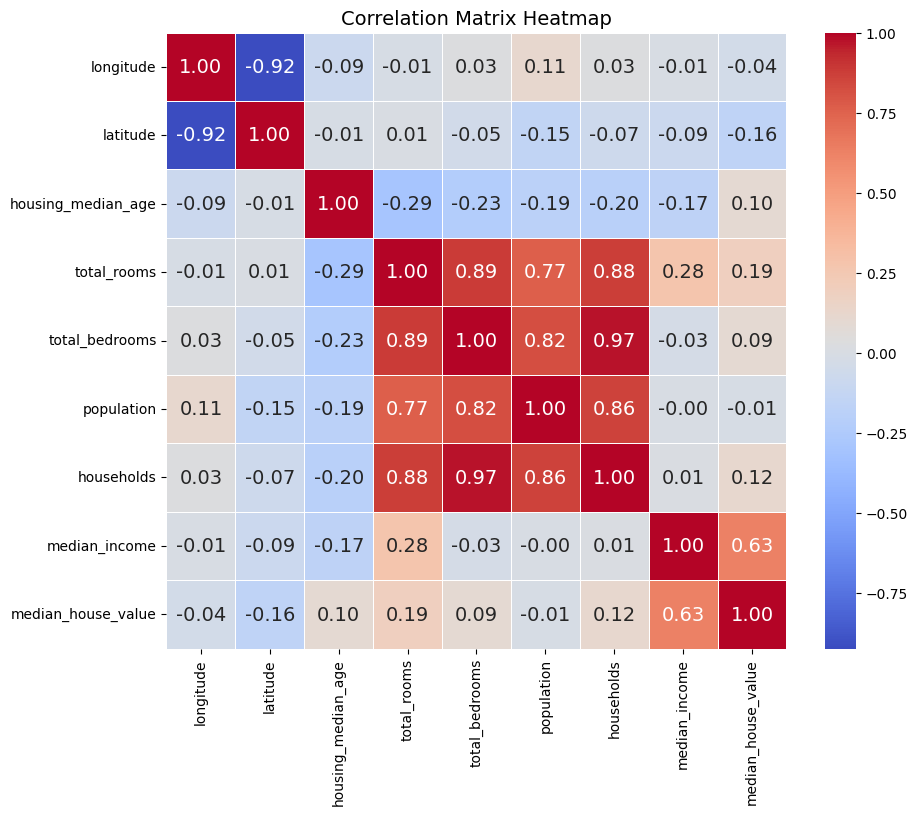

In [ ]:
import seaborn as sns

# Heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = housing_cleaned_outliers[numerical_columns].corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

####Bar chart showing top correlations with our target Median House Value.

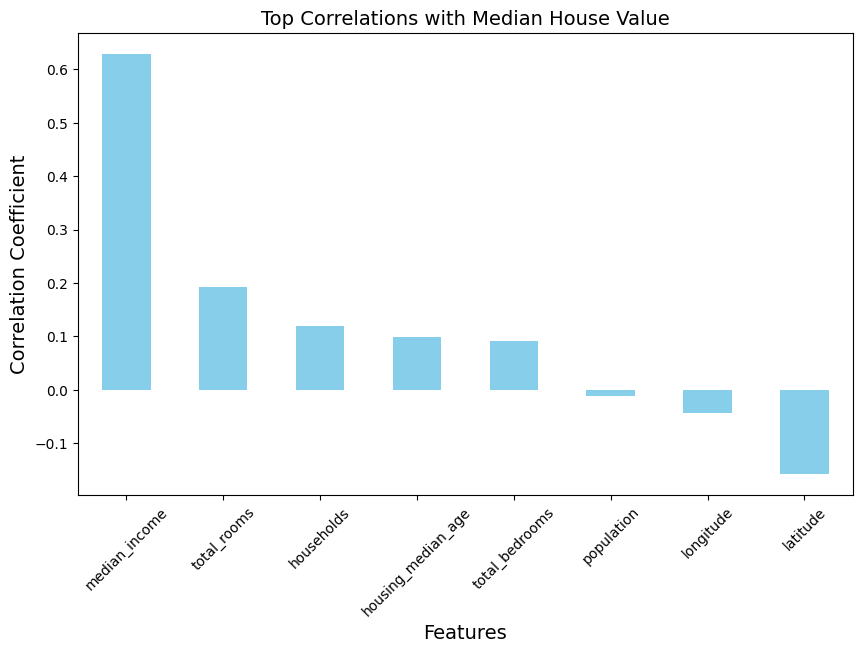

In [ ]:
# Extract the top correlations with median_house_value from the cleaned data
top_correlations = cleaned_target_correlation.drop('median_house_value').sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
top_correlations.plot(kind='bar', color='skyblue')
plt.title('Top Correlations with Median House Value')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.xticks(rotation=45)
plt.show()

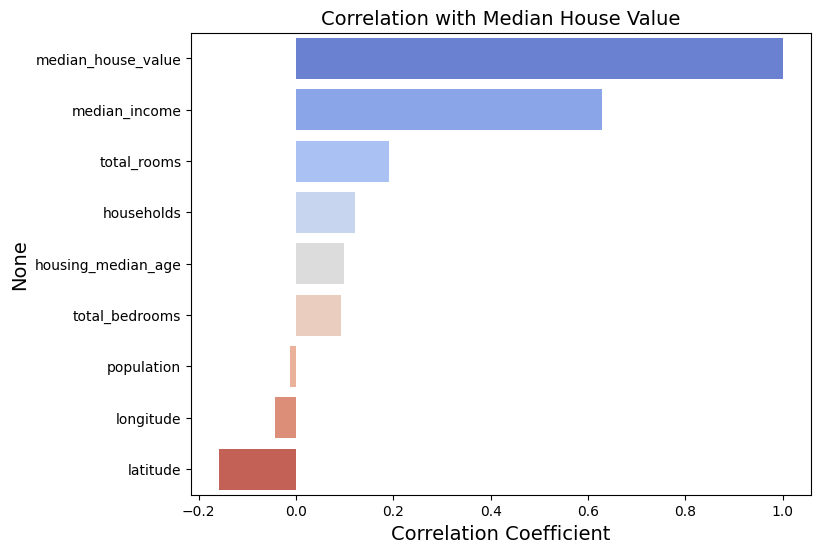

In [ ]:
plt.figure(figsize=(8, 6))
correlation_with_target = housing_cleaned_outliers.corr(numeric_only=True)['median_house_value'].sort_values(ascending=False)
sns.barplot(x=correlation_with_target.values, y=correlation_with_target.index, palette='coolwarm')
plt.title('Correlation with Median House Value')
plt.xlabel('Correlation Coefficient')
plt.show()

###Splitting the cleaned dataset into a training and test set.

In [ ]:
from sklearn.model_selection import train_test_split

# Split the cleaned dataset into training and test sets
train_set, test_set = train_test_split(housing_cleaned_outliers, test_size=0.2, random_state=42)

# Display the shapes of the training and test sets
print("Training set shape:", train_set.shape)
print("Test set shape:", test_set.shape)

Training set shape: (13947, 10)
Test set shape: (3487, 10)


In [ ]:
# Calculate the percentage difference between the sizes of the training and test sets
train_size = train_set.shape[0]
test_size = test_set.shape[0]

# Calculate the percentage difference
percentage_difference = (abs(train_size - test_size) / ((train_size + test_size) / 2)) * 100

print(f"Percentage difference between training and test set sizes: {percentage_difference:.2f}%")

Percentage difference between training and test set sizes: 120.00%


We have an ideal test and training set to proceed with our train_set and test_set.